Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve, auc, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform

data=pd.read_csv('/content/creditcard.csv')
data.head(10)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


Data cleaning

In [2]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

# Dropping rows with missing values (if any)

In [3]:
data = data.dropna()



# Checking for duplicate rows

In [4]:
print("\nDuplicate Rows:", data.duplicated().sum())


Duplicate Rows: 111


# removing duplicate rows

In [5]:
data = data.drop_duplicates()
print(f"New shape after removing duplicates: {data.shape}")

New shape after removing duplicates: (27707, 31)


 4. Handle outliers (e.g., using IQR for 'Amount')

In [6]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping extreme values

In [7]:
data['Amount'] = data['Amount'].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-7-1149115809>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount'] = data['Amount'].clip(lower=lower_bound, upper=upper_bound)


# 5. Feature scaling (standardizing 'Amount' and 'Time')

In [8]:
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

<ipython-input-8-3473784278>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])


# Correlation heatmap

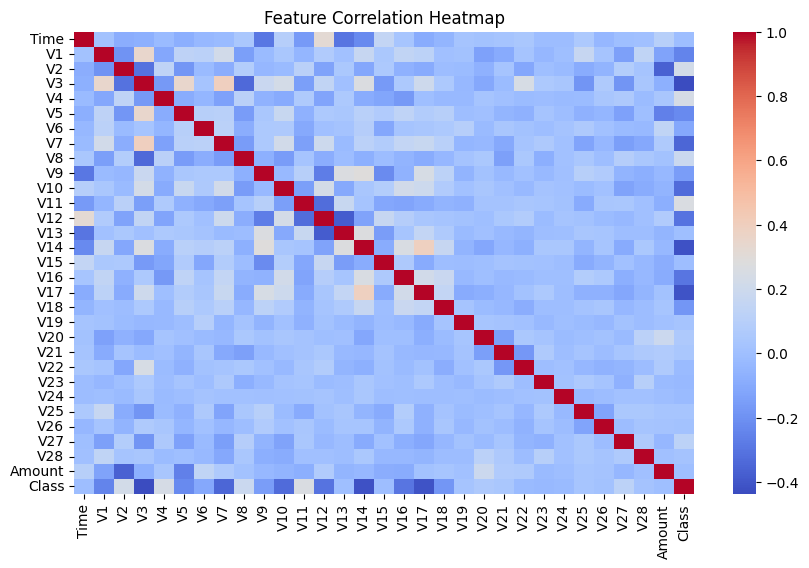

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#  Visualizing 'Amount' for fraud and non-fraud transactions

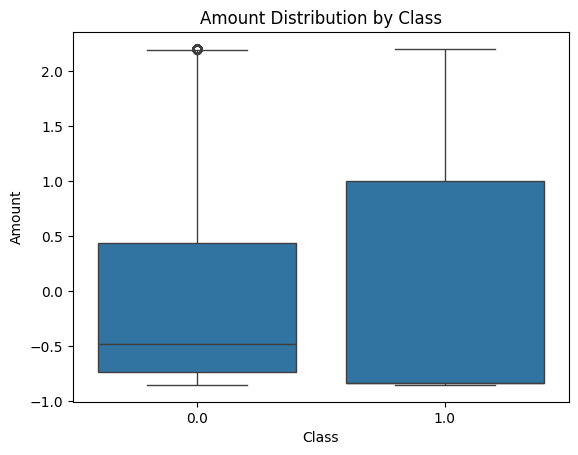

In [10]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Amount Distribution by Class")
plt.show()

# splitting features and targets

In [11]:
x=data.drop(columns=['Class'])
y=data['Class']

Train-test split

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.2, random_state=42, stratify=y)

In [13]:
fraud_train = x_train[y_train == 1]
non_fraud_train = x_train[y_train == 0]

fraud_oversampled = fraud_train.sample(len(non_fraud_train), replace=True, random_state=42)
x_train_balanced = pd.concat([non_fraud_train, fraud_oversampled])
y_train_balanced = pd.concat([y_train[y_train == 0], y_train[y_train == 1].sample(len(non_fraud_train), replace=True, random_state=42)])

x_train_balanced, y_train_balanced = sklearn.utils.shuffle(x_train_balanced, y_train_balanced, random_state=42)
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

# plotting AUC-ROC and AUC-PR curves

In [14]:
def plot_roc_and_pr_curve(model, x_test, y_test, model_name):

    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # PR Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    # Plot ROC Curve
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")

    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

Naive Bayes Algorithm


Training Naive Bayes Model

Result by Naive Bayes: 

Accuracy: 0.95
[[5273  250]
 [   2   17]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      5523
         1.0       0.06      0.89      0.12        19

    accuracy                           0.95      5542
   macro avg       0.53      0.92      0.55      5542
weighted avg       1.00      0.95      0.97      5542



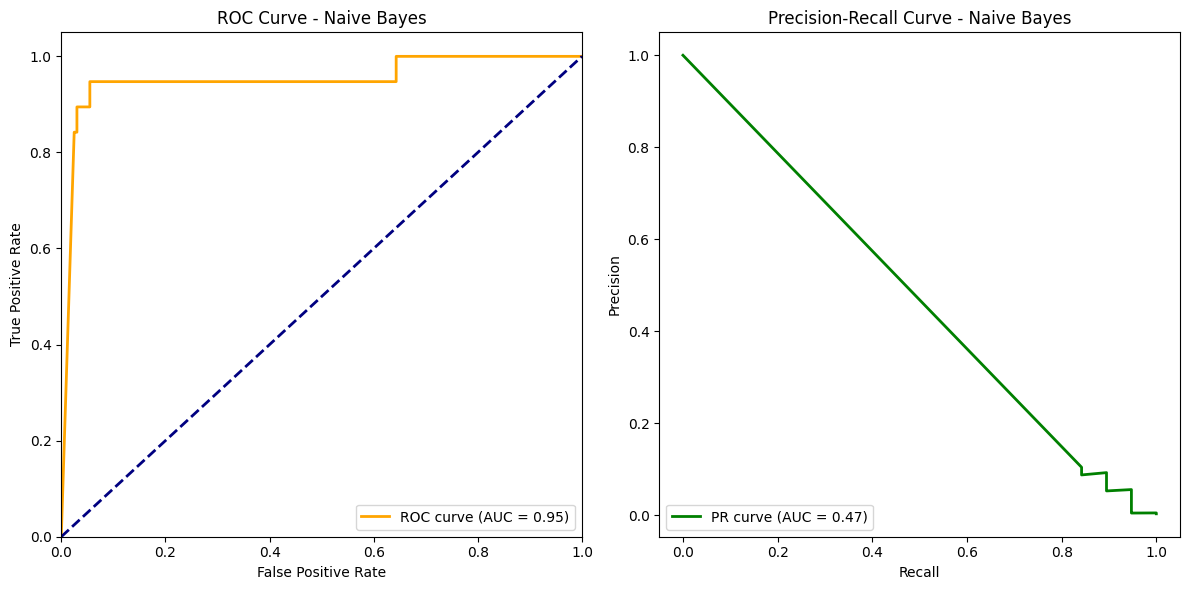

In [15]:
print("\nTraining Naive Bayes Model\n")
nb_model=GaussianNB()
nb_model.fit(x_train_balanced, y_train_balanced)
nb_pred=nb_model.predict(x_test)
print("Result by Naive Bayes: \n")
print(f"Accuracy: {accuracy_score(y_test, nb_pred):.2f}")
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))
plot_roc_and_pr_curve(nb_model, x_test, y_test, "Naive Bayes")


# random search for Naive Bayes

In [16]:
param_grid_nb = {'var_smoothing': np.logspace(-9, 0, 50)}
nb_random_search = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_grid_nb, scoring='accuracy', n_iter=20, cv=5, random_state=42)
nb_random_search.fit(x_train, y_train)

print("Best Parameters for Naive Bayes:", nb_random_search.best_params_)
optimized_nb = nb_random_search.best_estimator_
y_pred_nb_opt = optimized_nb.predict(x_test)
print("Optimized Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb_opt))

Best Parameters for Naive Bayes: {'var_smoothing': np.float64(0.6551285568595523)}
Optimized Naive Bayes Accuracy: 0.9868278599783472


Logistic Regression Algorithm


Training Logistic Regression Model

Logistic Regression Results

Accuracy: 0.98
[[5423  100]
 [   7   12]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5523
         1.0       0.11      0.63      0.18        19

    accuracy                           0.98      5542
   macro avg       0.55      0.81      0.59      5542
weighted avg       1.00      0.98      0.99      5542



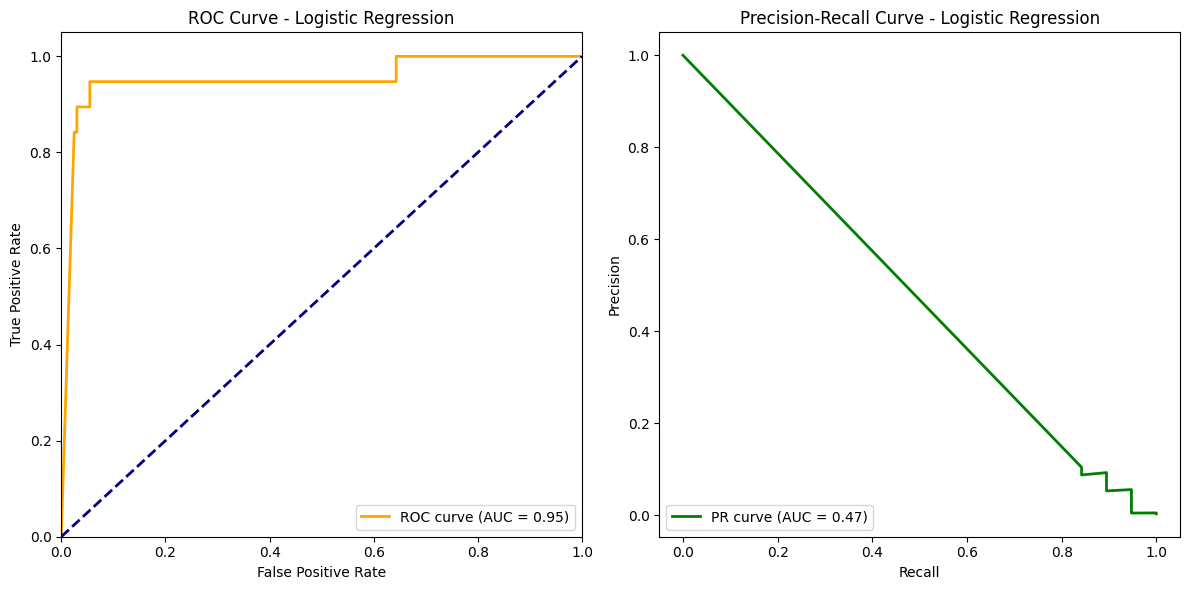

In [17]:
print("\nTraining Logistic Regression Model\n")
lr_model=LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(x_train_balanced, y_train_balanced)
lr_pred=lr_model.predict(x_test)
print("Logistic Regression Results\n")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.2f}")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
plot_roc_and_pr_curve(nb_model, x_test, y_test, "Logistic Regression")

# cross validation for logistic Regression

In [18]:
lr_cv_scores=cross_val_score(lr_model, x, y, cv=5, scoring='accuracy')
accuracy=lr_cv_scores.mean()
std_dev=lr_cv_scores.std()
print(f"Cross Validation Scores for Logistic Regression: {accuracy:.2f} ± {std_dev:.2f} ")

Cross Validation Scores for Logistic Regression: 1.00 ± 0.00 


# Logistic Regression Hyperparameter Tuning

In [19]:
param_grid_lr = {
    'C': np.logspace(-3, 3, 50),
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [100, 500, 1000]
}
lr_random_search = RandomizedSearchCV(estimator=LogisticRegression(random_state=42), param_distributions=param_grid_lr, scoring='accuracy', n_iter=20, cv=5, random_state=42, error_score='raise')
lr_random_search.fit(x_train, y_train)

print("Best Parameters for Logistic Regression:", lr_random_search.best_params_)
optimized_lr = lr_random_search.best_estimator_
y_pred_lr_opt = optimized_lr.predict(x_test)
print("Optimized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_opt))

Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1000, 'C': np.float64(0.868511373751352)}
Optimized Logistic Regression Accuracy: 0.9972933958859618


# Testing optimized models

In [20]:
optimized_models = [
    (optimized_nb, "Naive Bayes (Optimized)"),
    (optimized_lr, "Logistic Regression (Optimized)"),
]

# Evaluation of each optimized model

In [21]:
for model, name in optimized_models:
    print(f"\n{name} Results on Test Data:")
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Naive Bayes (Optimized) Results on Test Data:
Accuracy: 0.99
[[5453   70]
 [   3   16]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5523
         1.0       0.19      0.84      0.30        19

    accuracy                           0.99      5542
   macro avg       0.59      0.91      0.65      5542
weighted avg       1.00      0.99      0.99      5542


Logistic Regression (Optimized) Results on Test Data:
Accuracy: 1.00
[[5514    9]
 [   6   13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5523
         1.0       0.59      0.68      0.63        19

    accuracy                           1.00      5542
   macro avg       0.79      0.84      0.82      5542
weighted avg       1.00      1.00      1.00      5542



**K_NEIGBHOR CLASSIFICATION**


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

knn_model = KNeighborsClassifier()

random_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}


random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=random_params,
    scoring='f1',
    n_iter=3,
    cv=3,
    random_state=42

)



random_search.fit(x_train_balanced, y_train_balanced)

best_random_model = random_search.best_estimator_
print("\nBest Parameters (Random Search):", random_search.best_params_)


y_pred_test = best_random_model.predict(x_test)


Best Parameters (Random Search): {'weights': 'uniform', 'p': 1, 'n_neighbors': 3}


EVALAUTION AND **GRAPH** **bold text**


K-Nearest Neighbors with Random Search Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5523
         1.0       0.79      0.79      0.79        19

    accuracy                           1.00      5542
   macro avg       0.89      0.89      0.89      5542
weighted avg       1.00      1.00      1.00      5542



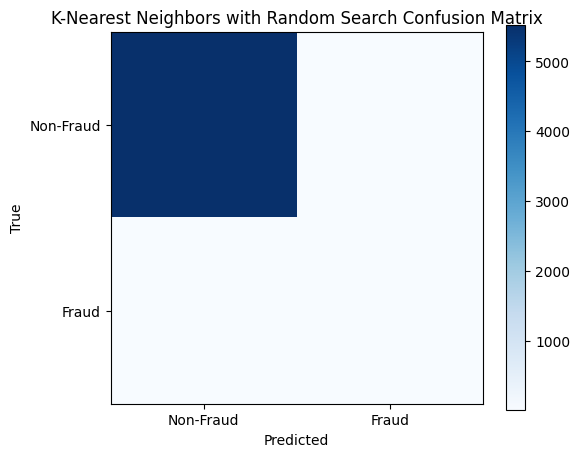

In [23]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.title(f"{model_name} Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
    plt.yticks([0, 1], ["Non-Fraud", "Fraud"])
    plt.show()


evaluate_model(y_test, y_pred_test, "K-Nearest Neighbors with Random Search")

**DecisionTreeClassifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')


random_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 1, 2, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=random_params,
    scoring='f1',
    n_iter=3,
    cv=3,
    random_state=42

)

random_search.fit(x_train_balanced, y_train_balanced)

best_random_model = random_search.best_estimator_
print("\nBest Parameters (Random Search):", random_search.best_params_)


y_pred_test = best_random_model.predict(x_test)



Best Parameters (Random Search): {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'gini'}


**Evaluation **


Decision Tree with Random Search Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5523
         1.0       0.17      0.95      0.29        19

    accuracy                           0.98      5542
   macro avg       0.59      0.97      0.64      5542
weighted avg       1.00      0.98      0.99      5542



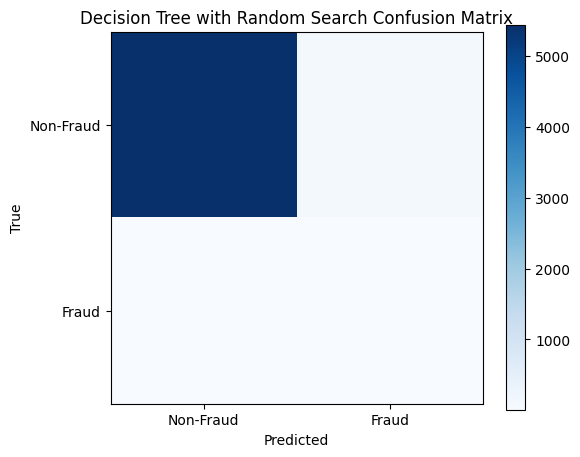

In [25]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.title(f"{model_name} Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
    plt.yticks([0, 1], ["Non-Fraud", "Fraud"])
    plt.show()


evaluate_model(y_test, y_pred_test, "Decision Tree with Random Search")